In [1]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from IPython.display import HTML
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns
import datetime as dt
from plotnine import ggplot, aes, geom_point, geom_line
import scipy
from scipy.stats import ttest_ind
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
merged = pd.read_csv('merged.csv')
merged

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PKG,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,Natural Chip Company Sea Salt 175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [3]:
merged.drop (['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PKG,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
0,2018-10-17,1,1000,1,5,Natural Chip Company Sea Salt 175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90


In [4]:
merged['DATE'] = pd.to_datetime(merged['DATE'])

In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PROD_PKG          246740 non-null  int64         
 9   PROD_BRAND        246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
 12  PRICE_PER_UNIT    246740 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memor

In [5]:
merged['PRICE_PER_UNIT'] = merged['TOT_SALES'] / merged ['PROD_QTY']

In [6]:
merged.insert(1,'YEAR_MONTH', merged['DATE'].dt.to_period('M')) #to insert new column at position 1

In [7]:
merged.insert(1,'YEAR-MONTH', merged['DATE'].dt.strftime("%Y%m").astype("int"))

In [ ]:
#created to year_month incase i need one in INT or period (M) format

In [16]:
merged

,DATE,YEAR-MONTH,YEAR_MONTH,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PKG,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
0,2018-10-17,201810,2018-10,1,1000,1,5,Natural Chip Company Sea Salt 175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,201905,2019-05,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,201905,2019-05,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,201808,2018-08,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,201808,2018-08,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,201903,2019-03,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40
246736,2018-08-13,201808,2018-08,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40
246737,2018-11-06,201811,2018-11,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40
246738,2018-12-27,201812,2018-12,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90


Compile each store's monthly:

Total sales,
Number of customers,
No of transactions per customer,
Average chips per customer,
Average price per unit....

In [42]:
SYM =  merged.groupby(['STORE_NBR','YEAR-MONTH'])  
TS  =  SYM ["TOT_SALES"].sum()
NC  =  SYM ["LYLTY_CARD_NBR"].nunique()
NTPC =  SYM.size() / NC
ACPC = SYM ["PROD_QTY"].sum() / NC #product quntity per customer
APPU = SYM ['PRICE_PER_UNIT'].mean()
aggregates = [TS, NC, NTPC, ACPC, APPU]
merged_col = pd.concat(aggregates, axis=1)
merged_col.columns = ["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"]


In [43]:
merged_col = merged_col.reset_index()

In [44]:
merged_col#can see that store_nbr 1 has full 12month count

,STORE_NBR,YEAR-MONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,188.9,47,1.042553,1.234043,3.328571
1,1,201808,168.4,41,1.000000,1.268293,3.303659
2,1,201809,268.1,57,1.035088,1.245614,3.716949
3,1,201810,175.4,39,1.025641,1.307692,3.457500
4,1,201811,184.8,44,1.022727,1.250000,3.391111
...,...,...,...,...,...,...,...
3160,272,201902,385.3,44,1.068182,2.022727,4.342553
3161,272,201903,421.9,48,1.062500,2.020833,4.321569
3162,272,201904,445.1,54,1.037037,1.944444,4.248214
3163,272,201905,314.6,34,1.176471,2.088235,4.437500


In [45]:
merged_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        3165 non-null   int64  
 1   YEAR-MONTH       3165 non-null   int32  
 2   TOT_SALES        3165 non-null   float64
 3   nCustomers       3165 non-null   int64  
 4   nTxnPerCust      3165 non-null   float64
 5   nChipsPerTxn     3165 non-null   float64
 6   avgPricePerUnit  3165 non-null   float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 160.8 KB


In [46]:
#pre trial observation
#full observation (index)
#filter only stores with full 12month count observation

observ_counts = merged_col["STORE_NBR"].value_counts() #store numbr and count
FOI = observ_counts[observ_counts == 12].index #for stores with full 12 month count from july 2018 - june 2019
FO = merged_col[merged_col["STORE_NBR"].isin(FOI)]
pretrial_FO = FO[FO["YEAR-MONTH"] < (201902)] #for all dates below feb 2019 


pretrial_FO.head(13)    #filtered stores < (201902)                        

,STORE_NBR,YEAR-MONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,188.9,47,1.042553,1.234043,3.328571
1,1,201808,168.4,41,1.000000,1.268293,3.303659
2,1,201809,268.1,57,1.035088,1.245614,3.716949
3,1,201810,175.4,39,1.025641,1.307692,3.457500
4,1,201811,184.8,44,1.022727,1.250000,3.391111
5,1,201812,160.6,37,1.081081,1.297297,3.357500
6,1,201901,149.7,35,1.000000,1.171429,3.645714
12,2,201807,140.5,36,1.055556,1.194444,3.223684
13,2,201808,180.9,35,1.114286,1.428571,3.669231
14,2,201809,133.9,32,1.031250,1.125000,3.712121


In [52]:
FO #STORES WITH FULL OB

,STORE_NBR,YEAR-MONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,188.9,47,1.042553,1.234043,3.328571
1,1,201808,168.4,41,1.000000,1.268293,3.303659
2,1,201809,268.1,57,1.035088,1.245614,3.716949
3,1,201810,175.4,39,1.025641,1.307692,3.457500
4,1,201811,184.8,44,1.022727,1.250000,3.391111
...,...,...,...,...,...,...,...
3160,272,201902,385.3,44,1.068182,2.022727,4.342553
3161,272,201903,421.9,48,1.062500,2.020833,4.321569
3162,272,201904,445.1,54,1.037037,1.944444,4.248214
3163,272,201905,314.6,34,1.176471,2.088235,4.437500


In [53]:
def calcCorrTable(metricCol, storeComparison, inputTable=pretrial_FO):
   
    ### Calculate correlation for a measure, looping through each control store.
    ### Args:
        #metricCol (str): Name of column containing store's metric to perform correlation test on.
        #storeComparison (int): Trial store's number.
        #inputTable (dataframe):  Metric table with potential comparison stores =pretrial_FO
        
    #Returns:
        #DataFrame: Monthly correlation table between Trial and each Control stores.

    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    corrs = pd.DataFrame(columns = ["YEAR-MONTH", "Trial_Str", "Ctrl_Str", "Corr_Score"])
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    for control in control_store_nbrs:
        concat_df = pd.DataFrame(columns = ["YEAR-MONTH", "Trial_Str", "Ctrl_Str", "Corr_Score"])
        control_store = inputTable[inputTable["STORE_NBR"] == control][metricCol].reset_index()
        concat_df["Corr_Score"] = trial_store.corrwith(control_store, axis=1)
        concat_df["Trial_Str"] = storeComparison
        concat_df["Ctrl_Str"] = control
        concat_df["YEAR-MONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEAR-MONTH"])
        corrs = pd.concat([corrs, concat_df])
    return corrs

In [67]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calcCorrTable(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"], trial_num)])
    
corr_table.head(10)

,YEAR-MONTH,Trial_Str,Ctrl_Str,Corr_Score
0,201807,77,1,0.034814
1,201808,77,1,0.016913
2,201809,77,1,-0.007386
3,201810,77,1,-0.028897
4,201811,77,1,0.007466
5,201812,77,1,0.051555
6,201901,77,1,-0.017363
0,201807,77,2,0.116836
1,201808,77,2,0.094232
2,201809,77,2,0.080034


In [64]:
def calculateMagnitudeDistance(metricCol, storeComparison, inputTable=pretrial_FO):
    """Calculate standardised magnitude distance for a measure, looping through each control store.
    Args:
        metricCol (str): Name of column containing store's metric to perform distance calculation on.
        storeComparison (int): Trial store's number.
        inputTable (dataframe):  Metric table with potential comparison stores.
        
    Returns:
        DataFrame: Monthly magnitude-distance table between Trial and each Control stores.
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    dists = pd.DataFrame()
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol]
    for control in control_store_nbrs:
        concat_df  = abs(inputTable[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol] - inputTable[inputTable["STORE_NBR"] == control].reset_index()[metricCol])
        concat_df["YEAR-MONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEAR-MONTH"])
        concat_df["Trial_Str"] = storeComparison
        concat_df["Ctrl_Str"] = control
        dists = pd.concat([dists, concat_df])
        
        #### Standardise the magnitude distance so that the measure ranges from 0 to 1
    for col in metricCol:
        dists[col] = 1 - ((dists[col] - dists[col].min()) / (dists[col].max() - dists[col].min()))
    dists["magnitude"] = dists[metricCol].mean(axis=1)
    return dists  

In [65]:
dist_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dist_table = pd.concat([dist_table, calculateMagnitudeDistance(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"], trial_num)])
    
dist_table.head(8)
dist_table

,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,YEAR-MONTH,Trial_Str,Ctrl_Str,magnitude
0,0.939141,1.000000,0.906165,0.716452,0.879421,201807,77,1,0.888236
1,0.939447,0.950495,1.000000,0.807168,0.892552,201808,77,1,0.917932
2,0.960729,0.831683,0.967117,0.716360,0.729156,201809,77,1,0.841009
3,0.985532,0.970297,0.995288,0.943513,0.756396,201810,77,1,0.930205
4,0.969303,0.950495,0.880491,0.743772,0.803452,201811,77,1,0.869502
...,...,...,...,...,...,...,...,...,...
2,0.209407,0.268293,0.613056,0.797921,0.915917,201809,88,272,0.560919
3,0.358741,0.357724,0.773519,0.861789,0.972746,201810,88,272,0.664904
4,0.292148,0.317073,0.665863,0.792787,0.956228,201811,88,272,0.604820
5,0.370444,0.373984,0.571429,0.722481,0.972172,201812,88,272,0.602102


In [ ]:
# #We'll select control stores based on how similar monthly total sales in 
# dollar amounts and monthly number of customers are to the trial stores by
# using correlation and magnitude distance

In [68]:
def combine_corr_dist(metricCol, storeComparison, inputTable=pretrial_FO):
    corrs = calcCorrTable(metricCol, storeComparison, inputTable)
    dists = calculateMagnitudeDistance(metricCol, storeComparison, inputTable)
    dists = dists.drop(metricCol, axis=1)
    combine = pd.merge(corrs, dists, on=["YEAR-MONTH", "Trial_Str", "Ctrl_Str"])
    return combine

In [78]:
compare_metrics_table1 = pd.DataFrame()
for trial_num in [77]:
    compare_metrics_table1 = pd.concat([compare_metrics_table1, combine_corr_dist(["TOT_SALES"], trial_num)])

In [123]:
    compare_metrics_table1.tail(60)

,YEAR-MONTH,Trial_Str,Ctrl_Str,Corr_Score,magnitude,scoreNSales
1732,201810,77,264,1.0,0.979407,0.989704
1733,201811,77,264,1.0,0.962030,0.981015
1734,201812,77,264,1.0,0.997091,0.998546
1735,201901,77,264,1.0,0.973743,0.986871
1736,201807,77,265,1.0,0.978030,0.989015
1737,201808,77,265,1.0,0.967312,0.983656
1738,201809,77,265,1.0,0.931180,0.965590
1739,201810,77,265,1.0,0.970068,0.985034
1740,201811,77,265,1.0,0.960805,0.980403
1741,201812,77,265,1.0,0.935160,0.967580


In [80]:
corr_weight = 0.5
dist_weight = 1 - corr_weight

In [82]:
#Top 5 highest Composite Score for each Trial Store based on TOT_SALES
grouped_comparison_table1 = compare_metrics_table1.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table1["CompScore"] = (corr_weight * grouped_comparison_table1["Corr_Score"]) + (dist_weight * grouped_comparison_table1["magnitude"])
for trial_num in compare_metrics_table1["Trial_Str"].unique():
    print(grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore"))

     Trial_Str  Ctrl_Str     YEAR-MONTH  Corr_Score  magnitude  scoreNSales   
217         77       233  201822.571429         1.0   0.986702     0.993351  \
176         77       188  201822.571429         1.0   0.980567     0.990283   
120         77       131  201822.571429         1.0   0.977341     0.988670   
238         77       255  201822.571429         1.0   0.976794     0.988397   
192         77       205  201822.571429         1.0   0.976706     0.988353   
..         ...       ...            ...         ...        ...          ...   
68          77        72  201822.571429        -1.0   0.313175    -0.343413   
24          77        26  201822.571429        -1.0   0.304141    -0.347929   
37          77        40  201822.571429        -1.0   0.275084    -0.362458   
3           77         4  201822.571429        -1.0   0.236590    -0.381705   
54          77        58  201822.571429        -1.0   0.236508    -0.381746   

     CompScore  
217   0.993351  
176   0.990283  


In [89]:
compare_metrics_table2 = pd.DataFrame()
for trial_num in [77,86,88]:
    compare_metrics_table2 = pd.concat([compare_metrics_table2, combine_corr_dist(["nCustomers"], trial_num)])

In [90]:
#Top 5 highest Composite Score for each Trial Store based on nCustomers
grouped_comparison_table2 = compare_metrics_table2.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table2["CompScore"] = (corr_weight * grouped_comparison_table2["Corr_Score"]) + (dist_weight * grouped_comparison_table2["magnitude"])
for trial_num in compare_metrics_table2["Trial_Str"].unique():
    print(grouped_comparison_table2[grouped_comparison_table2["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore"))

     Trial_Str  Ctrl_Str     YEAR-MONTH  Corr_Score  magnitude  CompScore
217         77       233  201822.571429         1.0   0.991513   0.995757
38          77        41  201822.571429         1.0   0.961810   0.980905
15          77        17  201822.571429         1.0   0.960396   0.980198
42          77        46  201822.571429         1.0   0.960396   0.980198
134         77       145  201822.571429         1.0   0.957567   0.978784
..         ...       ...            ...         ...        ...        ...
1           77         2  201822.571429        -1.0   0.915134  -0.042433
4           77         5  201822.571429        -1.0   0.543140  -0.228430
6           77         7  201822.571429        -1.0   0.394625  -0.302687
2           77         3  201822.571429        -1.0   0.383310  -0.308345
3           77         4  201822.571429        -1.0   0.251768  -0.374116

[256 rows x 6 columns]
     Trial_Str  Ctrl_Str     YEAR-MONTH  Corr_Score  magnitude  CompScore
400         86

In [91]:
for trial_num in compare_metrics_table2["Trial_Str"].unique():
    a = grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").set_index(["Trial_Str", "Ctrl_Str"])["CompScore"]
    b = grouped_comparison_table2[grouped_comparison_table2["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").set_index(["Trial_Str", "Ctrl_Str"])["CompScore"]
    print((pd.concat([a,b], axis=1).sum(axis=1)/2).sort_values(ascending=False).head(3), '\n')

Trial_Str  Ctrl_Str
77         233         0.994554
           46          0.983852
           188         0.981705
dtype: float64 

Trial_Str  Ctrl_Str
86         155         0.493759
           225         0.492025
           114         0.489945
dtype: float64 

Trial_Str  Ctrl_Str
88         237         0.494774
           40          0.484901
           199         0.484611
dtype: float64 



# Highest control store for 77 :(233), 86 :(155), 88 :(237)

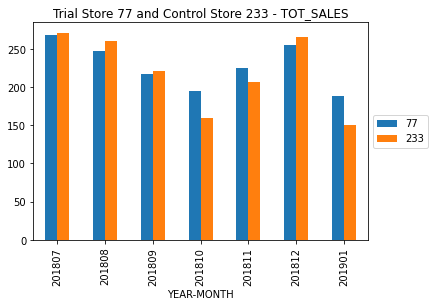

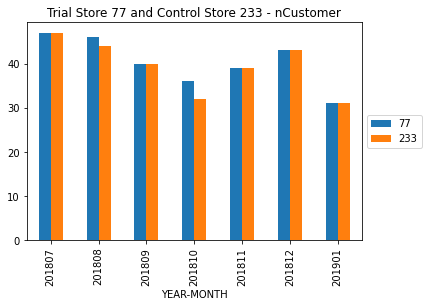

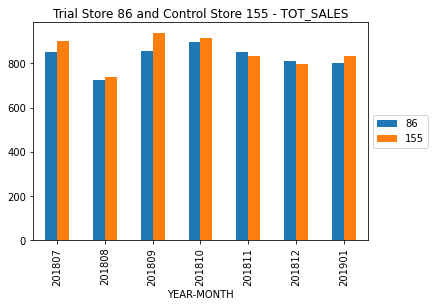

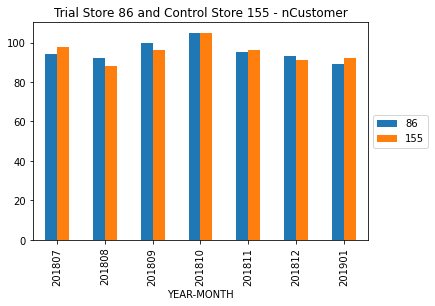

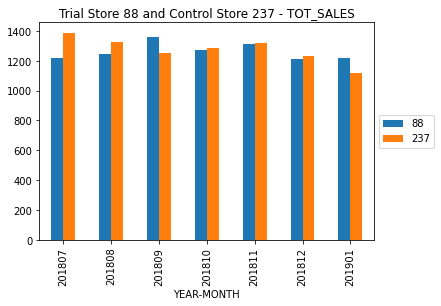

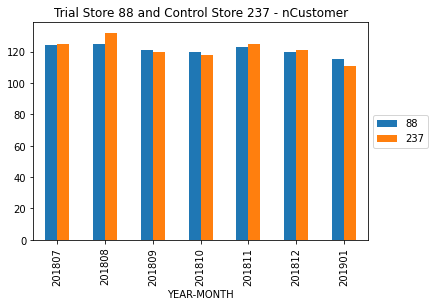

In [118]:
trial_control_dic = {77:233, 86:155, 88:237}
for key, val in trial_control_dic.items():
    pretrial_FO[pretrial_FO["STORE_NBR"].isin([key, val])].groupby(
        ["YEAR-MONTH", "STORE_NBR"]).sum()["TOT_SALES"].unstack().plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - TOT_SALES")
    plt.show()
    pretrial_FO[pretrial_FO["STORE_NBR"].isin([key, val])].groupby(
    ["YEAR-MONTH", "STORE_NBR"]).sum()["nCustomers"].unstack().plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - nCustomer")
    plt.show()
    print('\n')

In [140]:
#Ratio of Store 77 and its Control store.
sales_ratio_77 = pretrial_FO[pretrial_FO["STORE_NBR"] == 77]["TOT_SALES"].sum() / pretrial_FO[pretrial_FO["STORE_NBR"] == 233]["TOT_SALES"].sum()

#Ratio of Store 86 and its Control store.
sales_ratio_86 = pretrial_FO[pretrial_FO["STORE_NBR"] == 86]["TOT_SALES"].sum() / pretrial_FO[pretrial_FO["STORE_NBR"] == 155]["TOT_SALES"].sum()

#Ratio of Store 77 and its Control store.
sales_ratio_88 = pretrial_FO[pretrial_FO["STORE_NBR"]  == 88]["TOT_SALES"].sum() / pretrial_FO[pretrial_FO["STORE_NBR"] == 237]["TOT_SALES"].sum()

In [141]:
trial_full_observ = FO[(FO["YEAR-MONTH"] >= 201902) & (FO["YEAR-MONTH"] <= 201904)]
scaled_sales_control_stores = FO[FO["STORE_NBR"].isin([233, 155, 237])][["STORE_NBR", "YEAR-MONTH", "TOT_SALES"]]

def scaler(row):
    if row["STORE_NBR"] == 233:
        return row["TOT_SALES"] * sales_ratio_77
    elif row["STORE_NBR"] == 155:
        return row["TOT_SALES"] * sales_ratio_86
    elif row["STORE_NBR"] == 237:
        return row["TOT_SALES"] * sales_ratio_88

scaled_sales_control_stores["ScaledSales"] = scaled_sales_control_stores.apply(lambda row: scaler(row), axis=1)

trial_scaled_sales_control_stores = scaled_sales_control_stores[(scaled_sales_control_stores["YEAR-MONTH"] >= 201902) & (scaled_sales_control_stores["YEAR-MONTH"] <= 201904)]
pretrial_scaled_sales_control_stores = scaled_sales_control_stores[scaled_sales_control_stores["YEAR-MONTH"] < 201902]

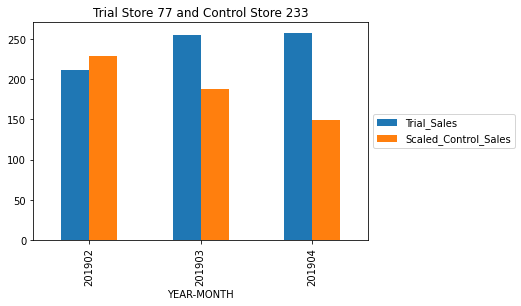

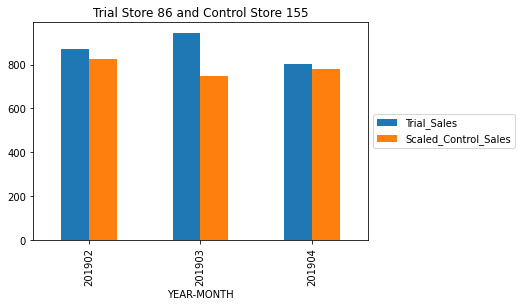

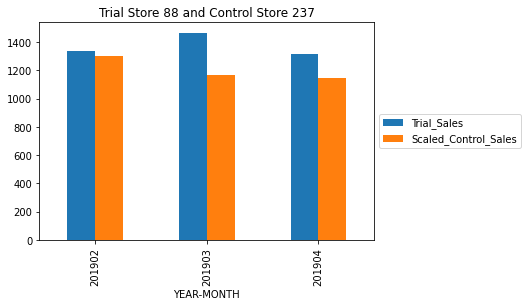

In [142]:
percentage_diff = {}

for trial, control in trial_control_dic.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEAR-MONTH", "TOT_SALES"]]
    percentage_diff[trial] = b["TOT_SALES"].sum() / a["ScaledSales"].sum()
    b[["YEAR-MONTH", "TOT_SALES"]].merge(a[["YEAR-MONTH", "ScaledSales"]],on="YEAR-MONTH").set_index("YEAR-MONTH").rename(columns={"ScaledSales":"Scaled_Control_Sales", "TOT_SALES":"Trial_Sales"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [143]:
percentage_diff

{77: 1.2778901246373204, 86: 1.1155403148404528, 88: 1.142094787114983}

In [144]:
#Creating a compiled percentage_difference table
temp1 = scaled_sales_control_stores.sort_values(by=["STORE_NBR", "YEAR-MONTH"], ascending=[False, True]).reset_index().drop(["TOT_SALES", "index"], axis=1)
temp2 = FO[FO["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEAR-MONTH", "TOT_SALES"]].reset_index().drop(["index", "YEAR-MONTH"], axis=1)
scaledsales_vs_trial = pd.concat([temp1, temp2], axis=1)
scaledsales_vs_trial.columns = ["c_STORE_NBR", "YEAR-MONTH", "c_ScaledSales", "t_STORE_NBR", "t_TOT_SALES"]
scaledsales_vs_trial["Sales_Percentage_Diff"] = (scaledsales_vs_trial["t_TOT_SALES"] - scaledsales_vs_trial["c_ScaledSales"]) / (((scaledsales_vs_trial["t_TOT_SALES"] + scaledsales_vs_trial["c_ScaledSales"])/2))
def label_period(cell):
    if cell < 201902:
        return "pre"
    elif cell > 201904:
        return "post"
    else:
        return "trial"
scaledsales_vs_trial["trial_period"] = scaledsales_vs_trial["YEAR-MONTH"].apply(lambda cell: label_period(cell))
scaledsales_vs_trial[scaledsales_vs_trial["trial_period"] == "trial"]

,c_STORE_NBR,YEAR-MONTH,c_ScaledSales,t_STORE_NBR,t_TOT_SALES,Sales_Percentage_Diff,trial_period
7,237,201902,1300.879003,77,211.6,-1.440389,trial
8,237,201903,1166.728952,77,255.1,-1.282333,trial
9,237,201904,1142.950509,77,258.1,-1.263124,trial
19,233,201902,229.473346,86,872.8,1.167272,trial
20,233,201903,187.779277,86,945.4,1.337160,trial
21,233,201904,149.932291,86,804.0,1.371308,trial
31,155,201902,827.019610,88,1339.6,0.473161,trial
32,155,201903,745.561872,88,1467.0,0.652129,trial
33,155,201904,778.028321,88,1317.0,0.514524,trial


Check significance of Trial minus Control stores TOT_SALES Percentage Difference Pre-Trial vs Trial.

Step 1: Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.

Step 2: Proof control and trial stores are similar statistically

Check p-value of control store's Pre-Trial vs Trial store's Pre-Trial.
If <5%, it is significantly different. If >5%, it is not significantly different (similar).
Step 3: After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.

Check T-Value of Percentage Difference of each Trial month (Feb, March, April 2019).
Mean is mean of Percentage Difference during pre-trial.
Standard deviation is stdev of Percentage Difference during pre-trial.
Formula is Trial month's Percentage Difference minus Mean, divided by Standard deviation.
Compare each T-Value with 95% percentage significance critical t-value of 6 degrees of freedom (7 months of sample - 1)

In [147]:
from scipy.stats import ttest_ind, t

# Step 1
for num in [237, 155, 233]:
    print("Store", num)
    print(ttest_ind(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"],
                   trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"],
                   equal_var=False), '\n')
    #print(len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"]), len(trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"]))
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]),
                       len(trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num])])-1))


Store 237
Ttest_indResult(statistic=0.9948318246849736, pvalue=0.3786545574238377) 

Store 155
Ttest_indResult(statistic=1.2632008050177177, pvalue=0.24959862186836165) 

Store 233
Ttest_indResult(statistic=1.2851941918470577, pvalue=0.2540387701484951) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


Null hypothesis is true. There isn't any statistically significant difference between control store's scaled Pre-Trial and Trial period sales.

In [151]:
a = pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == 237]["ScaledSales"]
b = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == 237]["ScaledSales"]

In [154]:
# Step 2
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pretrial_FO[pretrial_FO["STORE_NBR"] == trial]["TOT_SALES"],
                   pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == cont]["ScaledSales"],
                   equal_var=True), '\n')
    #print(len(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["TOT_SALES"]),len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == cont]["ScaledSales"]))

alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pretrial_FO[pretrial_FO["STORE_NBR"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=2.4926005499695936e-15, pvalue=0.999999999999998) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 88 , Control store: 237
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


In [156]:
# Step 3
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledsales_vs_trial[(scaledsales_vs_trial["c_STORE_NBR"] == cont) & (scaledsales_vs_trial["trial_period"]=="pre")]
    std = temp_pre["Sales_Percentage_Diff"].std()
    mean = temp_pre["Sales_Percentage_Diff"].mean()
    #print(std, mean)
    for t_month in scaledsales_vs_trial[scaledsales_vs_trial["trial_period"] == "trial"]["YEAR-MONTH"].unique():
        pdif = scaledsales_vs_trial[(scaledsales_vs_trial["YEAR-MONTH"] == t_month) & (scaledsales_vs_trial["t_STORE_NBR"] == trial)]["Sales_Percentage_Diff"]
        print(t_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
201902 : -14.290548448496004
201903 : -13.414940683726646
201904 : -13.308528691025296


Trial store: 86 , Control store: 155
201902 : 10.611299433514128
201903 : 13.013517417336523
201904 : 13.496386538384376


Trial store: 88 , Control store: 237
201902 : 34.882393698113795
201903 : 38.23417276625682
201904 : 35.65705747839664


Critical t-value for 95% confidence interval:
1.9431802803927818


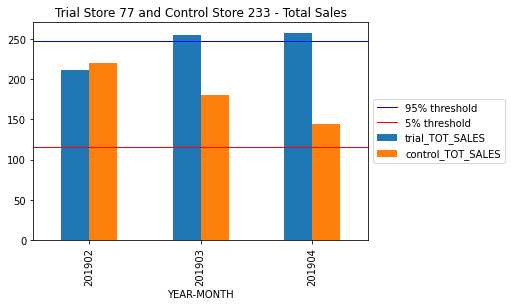

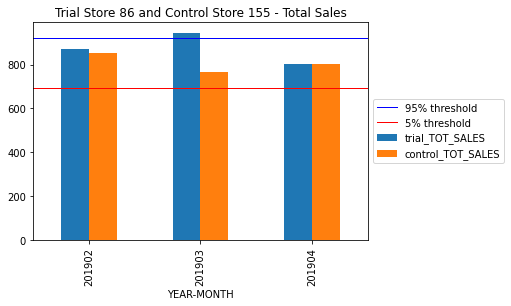

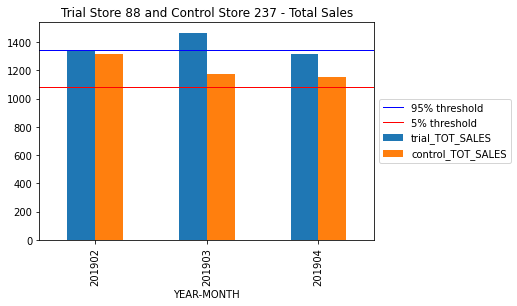

In [159]:
for trial, control in trial_control_dic.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control].rename(columns={"TOT_SALES": "control_TOT_SALES"})
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEAR-MONTH", "TOT_SALES"]].rename(columns={"TOT_SALES": "trial_TOT_SALES"})
    comb = b[["YEAR-MONTH", "trial_TOT_SALES"]].merge(a[["YEAR-MONTH", "control_TOT_SALES"]],on="YEAR-MONTH").set_index("YEAR-MONTH")
    comb.plot.bar()
    cont_sc_sales = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]["TOT_SALES"]
    std = scaledsales_vs_trial[(scaledsales_vs_trial["c_STORE_NBR"] == control) & (scaledsales_vs_trial["trial_period"]=="pre")]["Sales_Percentage_Diff"].std()
    thresh95 = cont_sc_sales.mean() + (cont_sc_sales.mean() * std * 2)
    thresh5 = cont_sc_sales.mean() - (cont_sc_sales.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Total Sales")
    plt.savefig("TS {} and CS {} - TOT_SALES.png".format(trial,control), bbox_inches="tight")

In [164]:
thresh5

1085.0122690459505

<Axes: xlabel='YEAR-MONTH'>

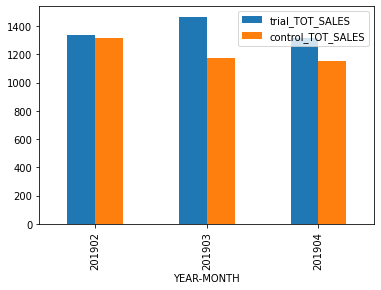

In [161]:
 comb.plot.bar()

In [166]:
ggplot(comb) + aes (x = 'comb', y = 'thresh5') + geom_line() 

ValueError: Data must be 1-dimensional, got ndarray of shape (3, 2) instead

In [160]:
ggplot(trialAssessment, aes(TransactionMonth, totSales, color = Store_type)) +
geom_rect(data = trialAssessment[ YEARMONTH < 201905 & YEARMONTH > 201901 ,],
aes(xmin = min(TransactionMonth), xmax = max(TransactionMonth), ymin = 0 ,
ymax = Inf, color = NULL), show.legend = FALSE) +
↪
↪
geom_line(aes(linetype = Store_type)) +
labs(x = "Month of operation", y = "Total sales", title = "Total sales by
↪ month")

SyntaxError: invalid syntax (2784849886.py, line 1)

We can see that Trial store 77 sales for March and April exceeds 95% threshold of control store. Same goes to store 86 & 88 sales for March.

Conclusion
We’ve found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the
three trial months but this is not the case for trial store 86. We can check with the client if the implementation
of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. Now that
we have finished our analysis, we can prepare our presentation to the Category Manager